<a href="https://colab.research.google.com/github/MaluGarcia18/predicciones-de-ventas-alimenticias/blob/main/predicciones_de_ventas_alimenticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [ ]:
filename = '/content/sales_predictions.csv' 

sales_predictions = pd.read_csv(filename)
sales_predictions.head(3) 

# Primero: con HEAD.() examinar y  conocer el archivo.

In [ ]:
# Segundo: Revisar entradas duplicadas

#sales_predictions.duplicated()
sales_predictions.duplicated().sum()

No me arroja valores duplicados, por consiguiente, no se requiere de la eliminación de dichos datos:

Tercero: Remover columnas innecesarias

Para este punto se eliminará la columna que señala el año en que estableció la tienda, ya que no es un dato que influya directamente en la predición de las ventas.   

Lo mismo con el tipo de área donde se encuentra la tienda, el tamaño de la tienda 

Columnas a eliminar: Outlet_Establishment_Year, Outlet_Size y Outlet_Location_Type.

In [41]:
# Tercero: Remover columnas innecesarias

sales_predictions = sales_predictions.drop(columns=['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type'])
sales_predictions.head()



KeyError: ignored

In [5]:
# 4. Usar el método .nunique() 

sales_predictions.nunique()

Item_Identifier      1559
Item_Weight           415
Item_Fat_Content        5
Item_Visibility      7880
Item_Type              16
Item_MRP             5938
Outlet_Identifier      10
Outlet_Type             4
Item_Outlet_Sales    3493
dtype: int64

Revisar que tipo de registros estan en las columnas de tipo categoricas para identificar faltas de ortografía, abreviaturas o errores tipográficos. Usando value_counts()

In [ ]:
# 5. Identificación de errores tipográficos en columnas categoricas.

sales_predictions['Outlet_Type'].value_counts()

In [7]:
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
sales_predictions['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [9]:
# 6. Identificar valores NaN.

sales_predictions.isna().sum()

Item_Identifier         0
Item_Weight          1463
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [10]:
# Aca se busca hacer la relación de total de registros por columnas vs la cantidad de valores NaN.

sales_predictions['Item_Weight'].count()


7060

Imputar valores faltantes:

1. No hacer nada.
2. Imputación utilizando valores (media/mediana).
3. Imputación usando valores (más frecuentes) o cero/constante.
4. Imputación usando K-NN.
5. Imputación usando imputación multivariada por ecucación encadenada (MICE).
6. Imputación usando Deep Learning (Datawig)

In [11]:
# Considero que para la columna Item_Weight podré usar la imputación MICE.

#import sys
#from impyute.imputation.cs import mice
# NO ME DIO EL RESULTADO ESPERADO, PENDIENTE DE REVISAR

Obtener la media de las columnas con datos númericos:

In [12]:
# Las columnas con datos númericos son:  Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales
## Primero identifico las columnas. 
sales_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Identifier    8523 non-null   object 
 1   Item_Weight        7060 non-null   float64
 2   Item_Fat_Content   8523 non-null   object 
 3   Item_Visibility    8523 non-null   float64
 4   Item_Type          8523 non-null   object 
 5   Item_MRP           8523 non-null   float64
 6   Outlet_Identifier  8523 non-null   object 
 7   Outlet_Type        8523 non-null   object 
 8   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


Item Weight: # Obtener mínimo, máximo y media para las columnas númericas.

In [14]:
sales_predictions['Item_Weight'].min()


4.555

In [15]:
sales_predictions['Item_Weight'].max()

21.35

In [16]:
sales_predictions['Item_Weight'].mean()

12.857645184135976

Item Visibility: # Obtener mínimo, máximo y media para las columnas númericas.

In [17]:
sales_predictions['Item_Visibility'].min()

0.0

In [18]:
sales_predictions['Item_Visibility'].max()

0.328390948

In [19]:
sales_predictions['Item_Visibility'].mean()

0.06613202877895108

Item MRP: # Obtener mínimo, máximo y media para las columnas númericas.

In [20]:
sales_predictions['Item_MRP'].min()

31.29

In [21]:
sales_predictions['Item_MRP'].max()

266.8884

In [22]:
sales_predictions['Item_MRP'].mean()

140.9927819781767

Item Outlet Sales: # Obtener mínimo, máximo y media para las columnas númericas.

In [23]:
sales_predictions['Item_Outlet_Sales'].min()

33.29

In [24]:
sales_predictions['Item_Outlet_Sales'].max()

13086.9648

In [25]:
sales_predictions['Item_Outlet_Sales'].mean()

2181.288913575032

# **Visualizaciones**

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

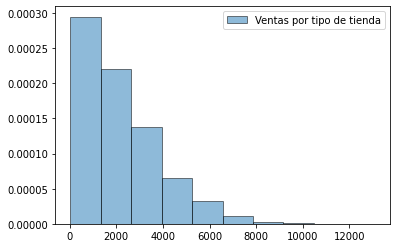

In [35]:
# Con este histograma se puede visualizar las ventas por tipo de tienda, en ella se usan intervalos de a 10.

plt.hist(sales_predictions['Item_Outlet_Sales'], alpha=0.5, density=True, label='Ventas por tipo de tienda', bins = 10, edgecolor='black')
plt.legend(loc='upper right')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

	

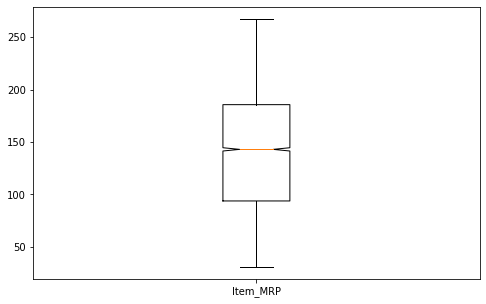

In [37]:
# Usando bloxplots se puede identificar con la columa del valor unitario. Se visualzia el precio mínio y máxio de todos los productos y se obtiene una media de 100 a 20o aproximadamente 

mrp = sales_predictions.loc[sales_predictions['Item_MRP']!='','Item_MRP']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
axes.boxplot([mrp], notch = True, labels=['Item_MRP']);

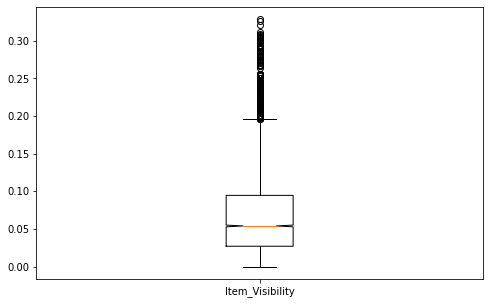

In [38]:
# Usando la columna de visbilidad podemos concluir que los valores dentro del primer cuartil de 0.0 a 2 expresa que los vlores se encuentran mayormente concrntrados este cuarti.

visibility = sales_predictions.loc[sales_predictions['Item_Visibility']!='','Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
axes.boxplot([visibility], notch = True, labels=['Item_Visibility']);

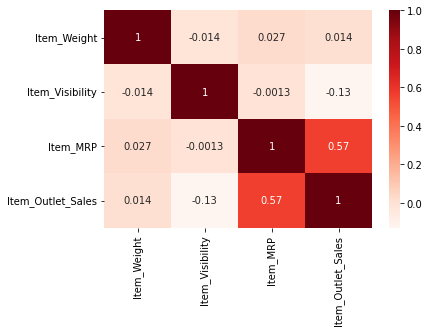

In [49]:
# A través del presente mapa de color se encuentra que no existe una alta correlación entre los valores float de la base.
# Existe una mediana correlación (o.57) entre el valor por item de los productos y el valor producto por tienda. 

mapa_calor = sales_predictions[['Item_Weight' ,'Item_Visibility' ,'Item_MRP', 'Item_Outlet_Sales']]
mapa_calor

corr = mapa_calor.corr()
sns.heatmap(corr, cmap = 'Reds', annot = True)